In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [16]:
dataset = pd.read_csv('raw_data_Textcnn.csv', header=0, index_col=0)
dataset.head()
# Sentiment = percentile of posi

,datatime,num,Sentiment,posi,nega,VIX_lastday,VIX,VIX_nextday,dVIX,fVIX
0,2020/1/21,28,0.714286,20,8,12.85,12.91,12.98,0.004669,0.005422
1,2020/1/22,36,0.583333,21,15,12.91,12.98,14.56,0.005422,0.121726
2,2020/1/23,66,0.666667,44,22,12.98,14.56,14.56,0.121726,0.000000
3,2020/1/24,52,0.634615,33,19,14.56,14.56,14.56,0.000000,0.000000
4,2020/1/25,74,0.554054,41,33,14.56,14.56,18.23,0.000000,0.252060


If we want to look at leading indicator, we drop the data when the next day is not a trading day and VIX doesn't change;

IF we want to look at lagging indicator, we drop the data when the current day is not atrading day and VIX doesn't chagne.

In [17]:
#dataset= dataset[dataset.dVIX != 0]
dataset= dataset[dataset.fVIX != 0]

Our plotting function

In [18]:
def runplt(x, y,yl):
    plt.figure()
    plt.title("predicted-actual value comparison")
    plt.xlabel("date point")
    if yl == 'VIX Value':
            plt.ylabel("VIX Value")
    elif yl == 'dVIX absolute value':
            plt.ylabel("dVIX absolute value")
    elif yl == 'dVIX percentile change':
            plt.ylabel("dVIX percentile change")
    
    plt.plot(range(len(x)),x,'b',label="predict")
    plt.plot(range(len(y)),y,'r',label="test")
    plt.legend(loc="upper right")
    plt.grid(True)
    return plt

First roughly take a look at the relations between dependent and independent variables 

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.close(fig=None)>

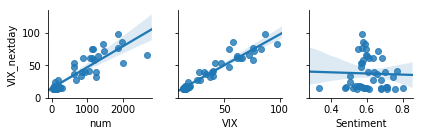

In [19]:
sns.pairplot(dataset,x_vars=['num','VIX','Sentiment'],y_vars='VIX_nextday',size=2,aspect=1,kind='reg')
plt.show
plt.close

Following are our results. We only show part of what we have tested, and most of the insignificant results have been dropped.

1. Including the historical VIX in our model

                            OLS Regression Results                            
Dep. Variable:            VIX_nextday   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     323.7
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.47e-20
Time:                        20:14:41   Log-Likelihood:                -101.02
No. Observations:                  32   AIC:                             208.0
Df Residuals:                      29   BIC:                             212.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7261      1.879      3.048      0.0

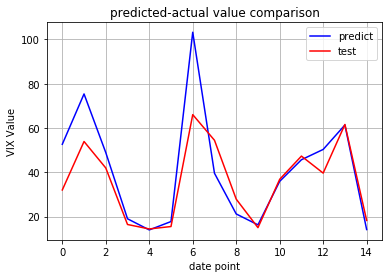

In [20]:
X=pd.DataFrame(dataset,columns=['VIX','num'])
y=dataset.VIX_nextday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.VIX+model.params[2]*X_test.num\
#+model.params[3]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test, 'VIX Value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:            VIX_nextday   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     362.3
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           2.68e-18
Time:                        20:14:41   Log-Likelihood:                -110.28
No. Observations:                  32   AIC:                             224.6
Df Residuals:                      30   BIC:                             227.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0045      1.993      5.523      0.0

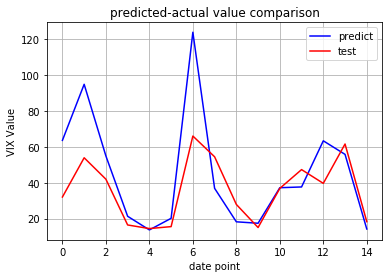

In [21]:
X=pd.DataFrame(dataset,columns=['num'])
y=dataset.VIX_nextday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num
#+model.params[3]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test, 'VIX Value')
# plt.plot(pred_value,y_test)
plt.show()

2. The rate of daily change (leading)

                            OLS Regression Results                            
Dep. Variable:                   fVIX   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.3270
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.724
Time:                        20:14:48   Log-Likelihood:                 10.143
No. Observations:                  32   AIC:                            -14.29
Df Residuals:                      29   BIC:                            -9.889
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.047      0.409      0.6

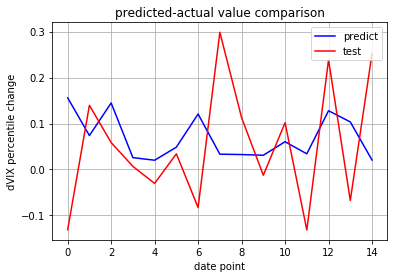

In [22]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.fVIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega
#+model.params[3]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX percentile change')
# plt.plot(pred_value,y_test)
plt.show()

3. Absolute change of VIX index (leading)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.5366
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.590
Time:                        20:14:58   Log-Likelihood:                -113.27
No. Observations:                  32   AIC:                             232.5
Df Residuals:                      29   BIC:                             236.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6691      2.225     -0.301      0.7

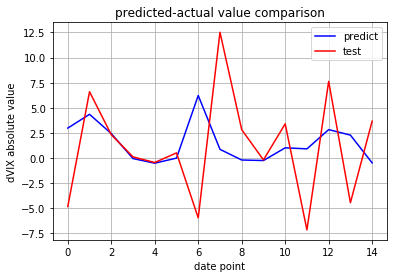

In [23]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX_nextday - dataset.VIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print (model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test,'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

Then we test lagging indicator

In [24]:
dataset = pd.read_csv('raw_data_Textcnn.csv', header=0, index_col=0)
dataset.head()
# Sentiment = percentile of 

dataset= dataset[dataset.dVIX != 0]

1. rate of daily change (lagging)

                            OLS Regression Results                            
Dep. Variable:                   dVIX   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.2212
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.803
Time:                        20:15:01   Log-Likelihood:                 13.607
No. Observations:                  32   AIC:                            -21.21
Df Residuals:                      29   BIC:                            -16.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0281      0.043      0.654      0.5

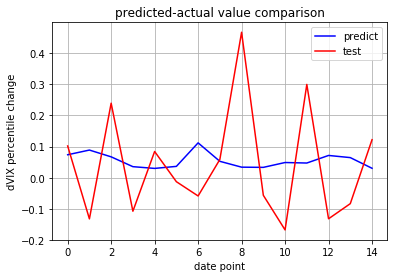

In [25]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.dVIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX percentile change')
# plt.plot(pred_value,y_test)
plt.show()

2. absolute change of VIX (lagging) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.2145
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.808
Time:                        20:15:02   Log-Likelihood:                -112.93
No. Observations:                  32   AIC:                             231.9
Df Residuals:                      29   BIC:                             236.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3903      2.243      0.174      0.8

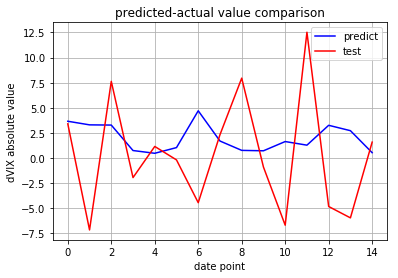

In [26]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

Finally, we test different proportion of training and testing data.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5867
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.562
Time:                        20:15:03   Log-Likelihood:                -129.74
No. Observations:                  37   AIC:                             265.5
Df Residuals:                      34   BIC:                             270.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6671      2.083      0.320      0.7

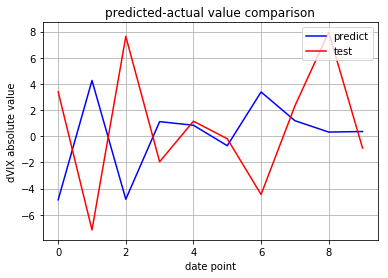

In [27]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.1634
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.850
Time:                        20:15:05   Log-Likelihood:                -99.962
No. Observations:                  28   AIC:                             205.9
Df Residuals:                      25   BIC:                             209.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2904      2.424      0.120      0.9

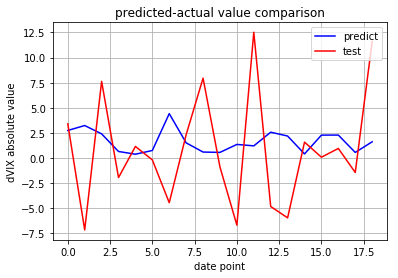

In [28]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.4350
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.653
Time:                        20:15:05   Log-Likelihood:                -83.605
No. Observations:                  23   AIC:                             173.2
Df Residuals:                      20   BIC:                             176.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1726      2.935     -0.059      0.9

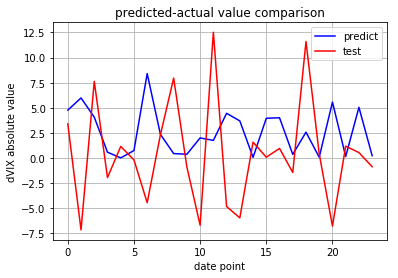

In [29]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()